In [1]:
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, accuracy_score, precision_recall_curve, average_precision_score

In [2]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the Wine dataset
wine_data = load_wine()

# Create a DataFrame
wine_dataset = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Add the target variable (class) to the DataFrame based on numerical labels
wine_dataset["class"] = wine_data.target

# Now, wine_dataset contains the Wine dataset in a DataFrame format with a "class" column

# Separate the target variable
target = wine_dataset["class"]
X = wine_dataset.drop("class", axis=1)

# Normalize features using Min-Max scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training, validation, and test sets (with stratification)
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, target, test_size=0.4, random_state=42, stratify=target)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (106, 13) (106,)
Validation set shape: (36, 13) (36,)
Test set shape: (36, 13) (36,)


In [3]:
#original dataset
print(wine_dataset.info())
print(wine_dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [4]:
#original dataset
wine_dataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
#original dataset
wine_dataset.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


class
1    71
0    59
2    48
Name: count, dtype: int64


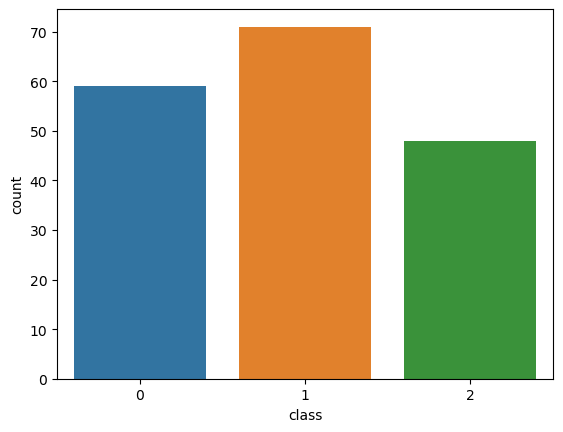

In [6]:
# Check the distribution of the target variable "class"
print(wine_dataset['class'].value_counts())
sns.countplot(x='class', data=wine_dataset)
plt.show()

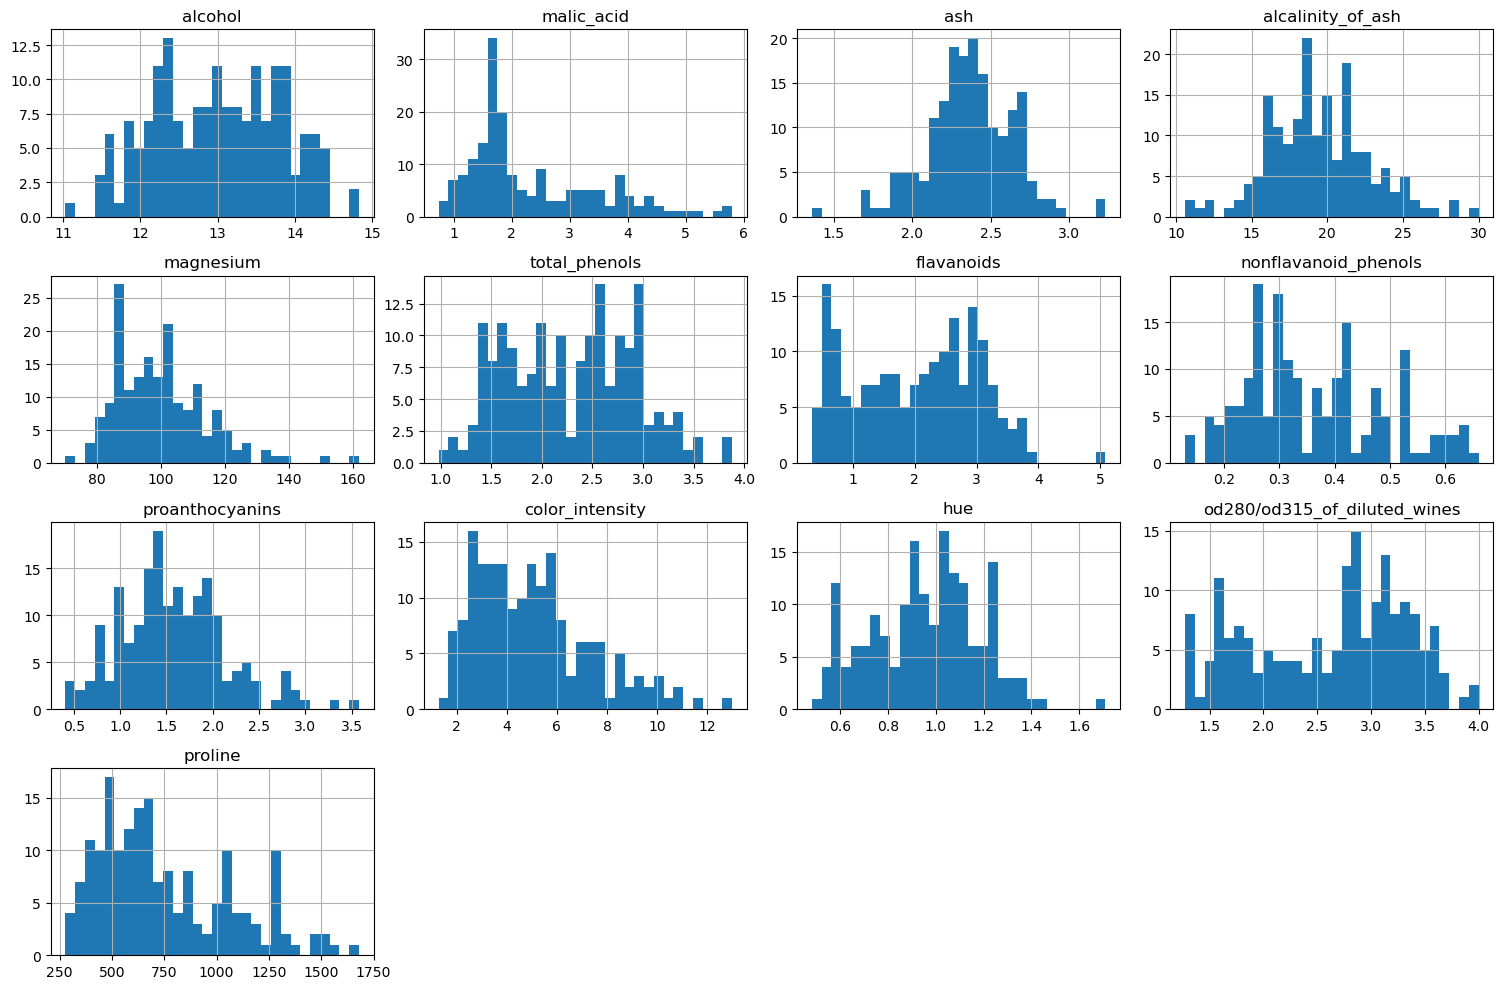

In [7]:
# Plot histograms for all continuous variables
wine_dataset.drop("class", axis=1).hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

Training Time: 0.00 seconds
Accuracy: 0.9444
F1 Score: 0.9452
Recall: 0.9524
Precision: 0.9441
Confusion Matrix:
[[12  0  0]
 [ 1 12  1]
 [ 0  0 10]]


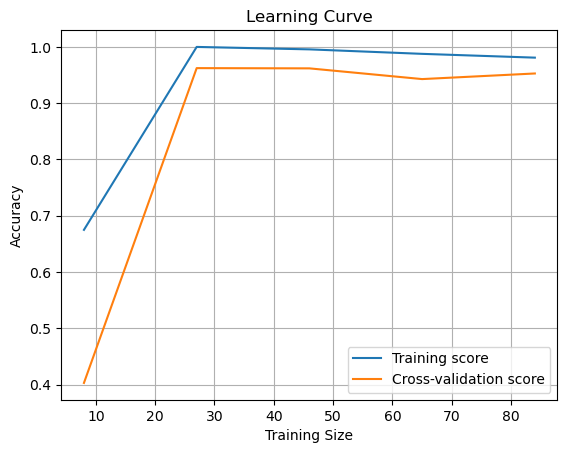

In [8]:
#KNN Baseline model
# Define the model
neigh = KNeighborsClassifier()

# Train the model and record the training time
start_time = time.time()
neigh.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Predict on the validation set
y_pred = neigh.predict(X_valid)

# Compute the metrics
accuracy = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred, average='macro')
recall = recall_score(y_valid, y_pred, average='macro')
precision = precision_score(y_valid, y_pred, average='macro')
confusion = confusion_matrix(y_valid, y_pred)

print(f"Training Time: {training_time:.2f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print("Confusion Matrix:")
print(confusion)

# Plotting learning curve
train_sizes, train_scores, test_scores = learning_curve(neigh, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best hyperparameters: {'n_neighbors': 17, 'p': 1}
Mean Cross-Validation Score of Best Model: 0.9905
Grid Search Execution Time: 0.36 seconds

Performance Metrics on Validation Set:
Accuracy: 0.9167
F1-score: 0.9185
Recall: 0.9286
Precision: 0.9221
Confusion Matrix:
[[12  0  0]
 [ 2 11  1]
 [ 0  0 10]]


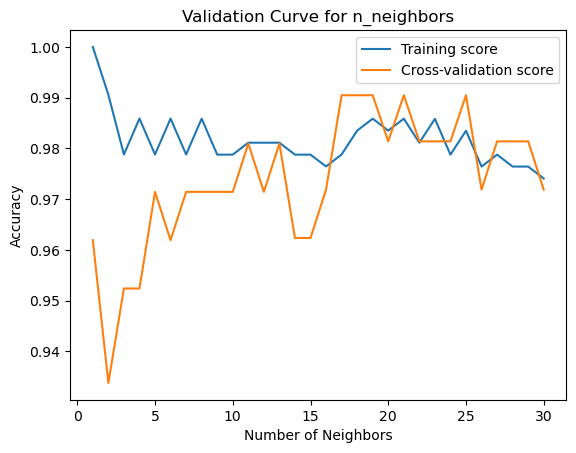

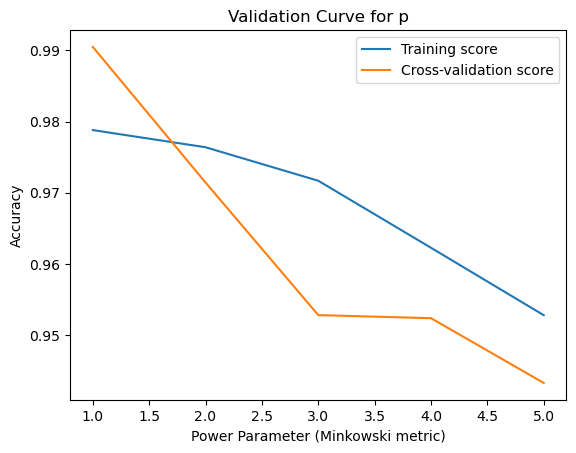

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import time

# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'p': list(range(1, 6))
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Start timing for Grid Search
start_time = time.time()

# Perform the Grid Search
grid_search.fit(X_train, y_train)

# End timing for Grid Search
end_time = time.time()
grid_search_time = end_time - start_time

# Print best parameters from the Grid Search
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")
print(f"Mean Cross-Validation Score of Best Model: {grid_search.best_score_:.4f}")
print(f"Grid Search Execution Time: {grid_search_time:.2f} seconds")

# Evaluate the best model on the validation set
y_pred_valid = grid_search.best_estimator_.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid, average='macro')
recall_valid = recall_score(y_valid, y_pred_valid, average='macro')
precision_valid = precision_score(y_valid, y_pred_valid, average='macro')
confusion_valid = confusion_matrix(y_valid, y_pred_valid)

print("\nPerformance Metrics on Validation Set:")
print(f"Accuracy: {accuracy_valid:.4f}")
print(f"F1-score: {f1_valid:.4f}")
print(f"Recall: {recall_valid:.4f}")
print(f"Precision: {precision_valid:.4f}")
print("Confusion Matrix:")
print(confusion_valid)

# Plot validation curve for n_neighbors
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(p=best_params['p']), 
    X_train, y_train, 
    param_name="n_neighbors", 
    param_range=list(range(1, 31)), 
    cv=5, scoring="accuracy", n_jobs=-1)

plt.figure()
plt.plot(list(range(1, 31)), np.mean(train_scores, axis=1), label='Training score')
plt.plot(list(range(1, 31)), np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for n_neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot validation curve for p
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(n_neighbors=best_params['n_neighbors']), 
    X_train, y_train, 
    param_name="p", 
    param_range=list(range(1, 6)), 
    cv=5, scoring="accuracy", n_jobs=-1)

plt.figure()
plt.plot(list(range(1, 6)), np.mean(train_scores, axis=1), label='Training score')
plt.plot(list(range(1, 6)), np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for p')
plt.xlabel('Power Parameter (Minkowski metric)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Performance Metrics on Test Set:
Accuracy: 0.9722
F1-score: 0.9752
Recall: 0.9778
Precision: 0.9744
Confusion Matrix:
[[12  0  0]
 [ 1 14  0]
 [ 0  0  9]]

Final Model Training Time: 0.00 seconds


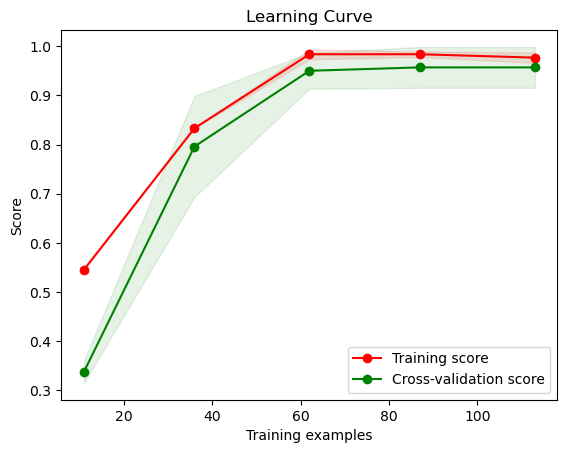

In [10]:
#optimized model:

from sklearn.model_selection import learning_curve

# Combine training and validation sets
X_final_train = np.concatenate([X_train, X_valid])
y_final_train = np.concatenate([y_train, y_valid])

# Train final model on the combined dataset
final_model = KNeighborsClassifier(n_neighbors=17, p=1)
start_time = time.time()
final_model.fit(X_final_train, y_final_train)
end_time = time.time()

# Evaluate on test set
y_pred_test = final_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')
precision_test = precision_score(y_test, y_pred_test, average='macro')
confusion_test = confusion_matrix(y_test, y_pred_test)

print("Performance Metrics on Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"F1-score: {f1_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print("Confusion Matrix:")
print(confusion_test)

print(f"\nFinal Model Training Time: {end_time - start_time:.2f} seconds")

# Plot Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    final_model, X_final_train, y_final_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Create the baseline Decision Tree model
dt_baseline = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_baseline.fit(X_train, y_train)

# Predict on the validation set
y_pred_valid = dt_baseline.predict(X_valid)

# Calculate performance metrics on the validation set
accuracy = accuracy_score(y_valid, y_pred_valid)
f1 = f1_score(y_valid, y_pred_valid, average='macro')
recall = recall_score(y_valid, y_pred_valid, average='macro')
precision = precision_score(y_valid, y_pred_valid, average='macro')
confusion = confusion_matrix(y_valid, y_pred_valid)

# Print performance metrics
print("Baseline Model Performance Metrics on Validation Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print("Confusion Matrix:")
print(confusion)

Baseline Model Performance Metrics on Validation Set:
Accuracy: 0.9722
F1-score: 0.9740
Recall: 0.9722
Precision: 0.9778
Confusion Matrix:
[[11  1  0]
 [ 0 14  0]
 [ 0  0 10]]


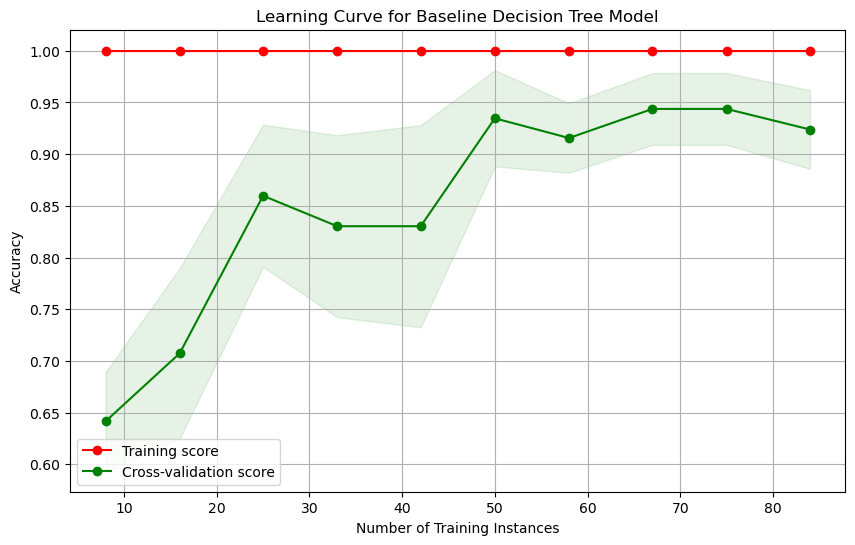

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Number of Training Instances")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot the learning curve
title = "Learning Curve for Baseline Decision Tree Model"
plot_learning_curve(dt_baseline, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

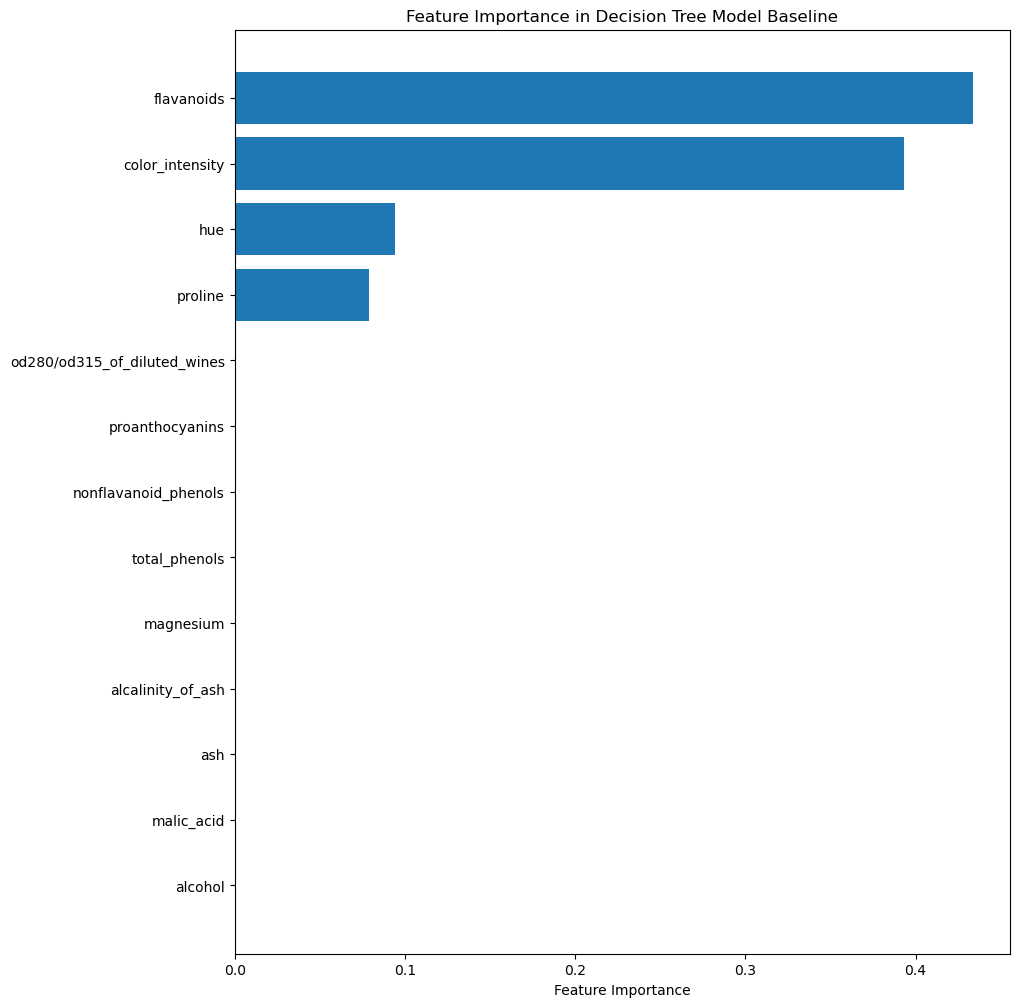

In [13]:
feature_importances = dt_baseline.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 12))
plt.barh(range(X_train.shape[1]), feature_importances[sorted_idx], align='center')
plt.yticks(range(X_train.shape[1]), X.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Decision Tree Model Baseline")
plt.show()

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best hyperparameters: {'ccp_alpha': 0.0, 'max_depth': None}
Grid Search Execution Time: 0.09 seconds
Cross-Validation Score on Training Data: 0.9238

Performance Metrics on Validation Set:
Accuracy: 0.9722
F1-score: 0.9740
Recall: 0.9722
Precision: 0.9778
Confusion Matrix:
[[11  1  0]
 [ 0 14  0]
 [ 0  0 10]]


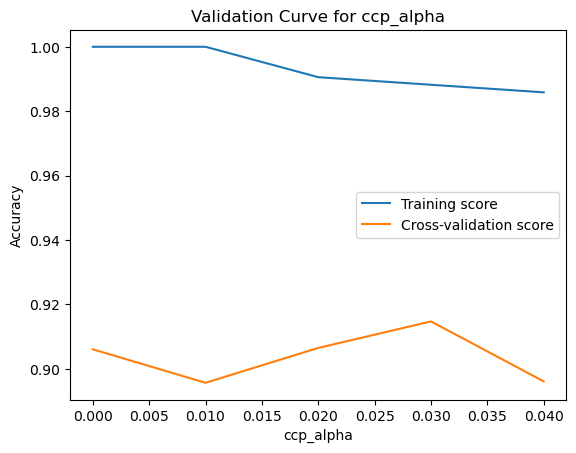

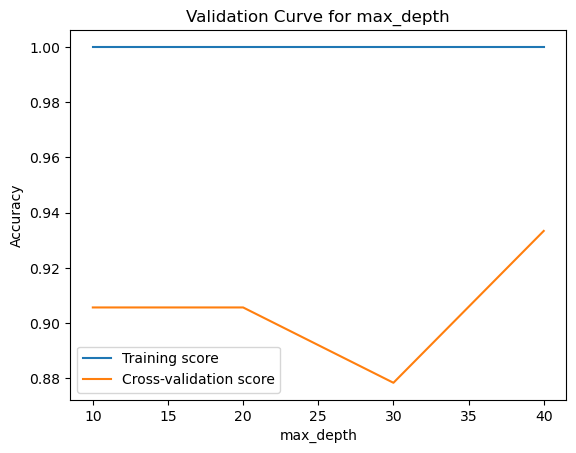

In [16]:
from sklearn.model_selection import GridSearchCV, cross_val_score, validation_curve

# Define the hyperparameter grid for tuning
param_grid = {
    'ccp_alpha': [0.0, 0.01, 0.02, 0.03, 0.04],  # Adjust the range as needed
    'max_depth': [None, 10, 20, 30, 40]  # Adjust the range as needed
}

# Initialize the Decision Tree classifier
dt_tuned = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(dt_tuned, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Start timing for Grid Search
start_time = time.time()

# Perform the Grid Search on the validation set
grid_search.fit(X_valid, y_valid)

# End timing for Grid Search
end_time = time.time()
grid_search_time = end_time - start_time

# Print best hyperparameters from the Grid Search
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")
print(f"Grid Search Execution Time: {grid_search_time:.2f} seconds")

# Train a Decision Tree model with the best hyperparameters on the training data
best_dt = DecisionTreeClassifier(random_state=42, **best_params)
best_dt.fit(X_train, y_train)

# Calculate and print the cross-validation score with the best model on the entire training dataset
cross_val_accuracy = cross_val_score(best_dt, X_train, y_train, cv=5, scoring='accuracy').mean()
print(f"Cross-Validation Score on Training Data: {cross_val_accuracy:.4f}")

# Predict on the validation set with the best model
y_pred_valid = best_dt.predict(X_valid)

# Calculate and print performance metrics on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid, average='macro')
recall_valid = recall_score(y_valid, y_pred_valid, average='macro')
precision_valid = precision_score(y_valid, y_pred_valid, average='macro')
confusion_valid = confusion_matrix(y_valid, y_pred_valid)

print("\nPerformance Metrics on Validation Set:")
print(f"Accuracy: {accuracy_valid:.4f}")
print(f"F1-score: {f1_valid:.4f}")
print(f"Recall: {recall_valid:.4f}")
print(f"Precision: {precision_valid:.4f}")
print("Confusion Matrix:")
print(confusion_valid)

# Plot validation curve for ccp_alpha
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(max_depth=best_params['max_depth']), 
    X_train, y_train, 
    param_name="ccp_alpha", 
    param_range=[0.0, 0.01, 0.02, 0.03, 0.04],  # Adjust the range as needed
    cv=5, scoring="accuracy", n_jobs=-1)

plt.figure()
plt.plot([0.0, 0.01, 0.02, 0.03, 0.04], np.mean(train_scores, axis=1), label='Training score')
plt.plot([0.0, 0.01, 0.02, 0.03, 0.04], np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for ccp_alpha')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot validation curve for max_depth
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(ccp_alpha=best_params['ccp_alpha']), 
    X_train, y_train, 
    param_name="max_depth", 
    param_range=[None, 10, 20, 30, 40],  # Adjust the range as needed
    cv=5, scoring="accuracy", n_jobs=-1)

plt.figure()
plt.plot([None, 10, 20, 30, 40], np.mean(train_scores, axis=1), label='Training score')
plt.plot([None, 10, 20, 30, 40], np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

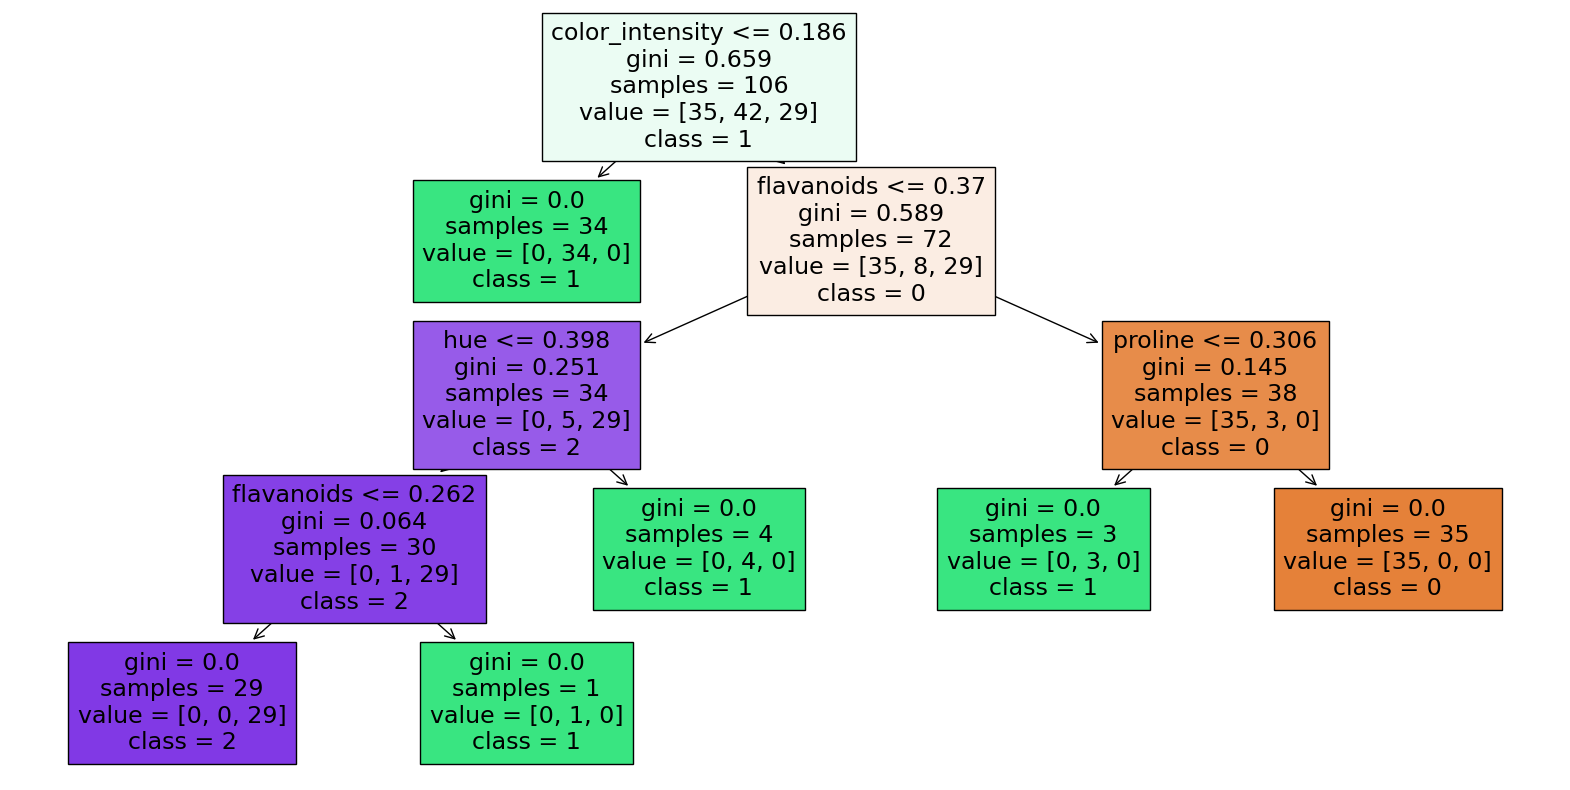

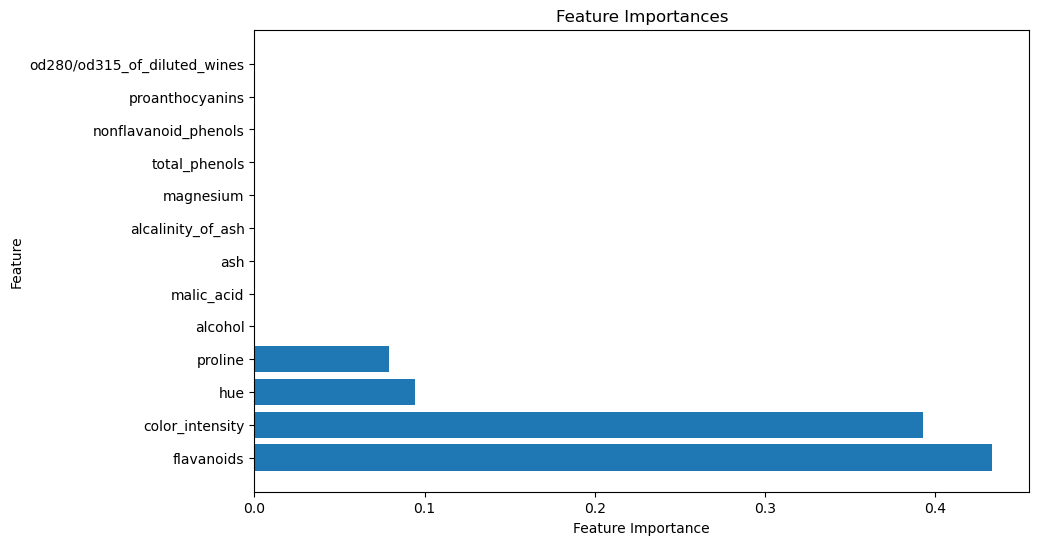

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Initialize the Decision Tree classifier with the best hyperparameters
best_dt = DecisionTreeClassifier(random_state=42, **best_params)

# Fit the model on the entire training dataset
best_dt.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, feature_names=X.columns.tolist(), class_names=[str(i) for i in best_dt.classes_])
plt.show()

# Get feature importances
feature_importances = best_dt.feature_importances_

# Create a DataFrame to visualize feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


Performance Metrics on Test Set:
Accuracy: 0.9444
F1-score: 0.9500
Recall: 0.9500
Precision: 0.9500
Confusion Matrix:
[[11  1  0]
 [ 1 14  0]
 [ 0  0  9]]
Training Time on Combined Dataset: 0.00 seconds


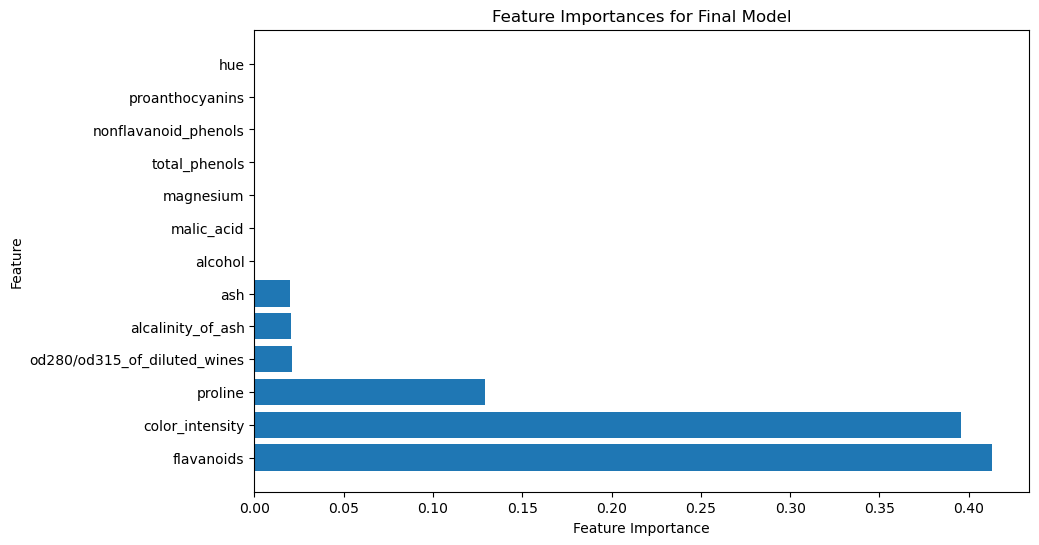

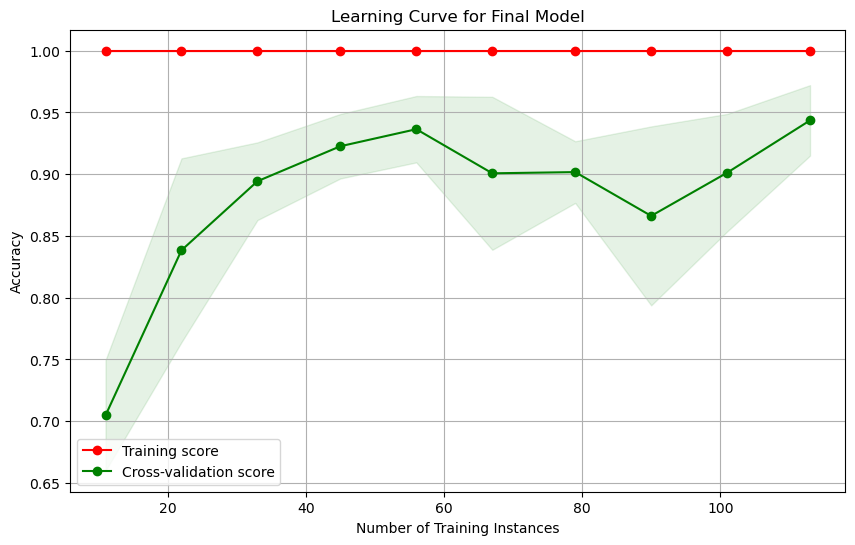

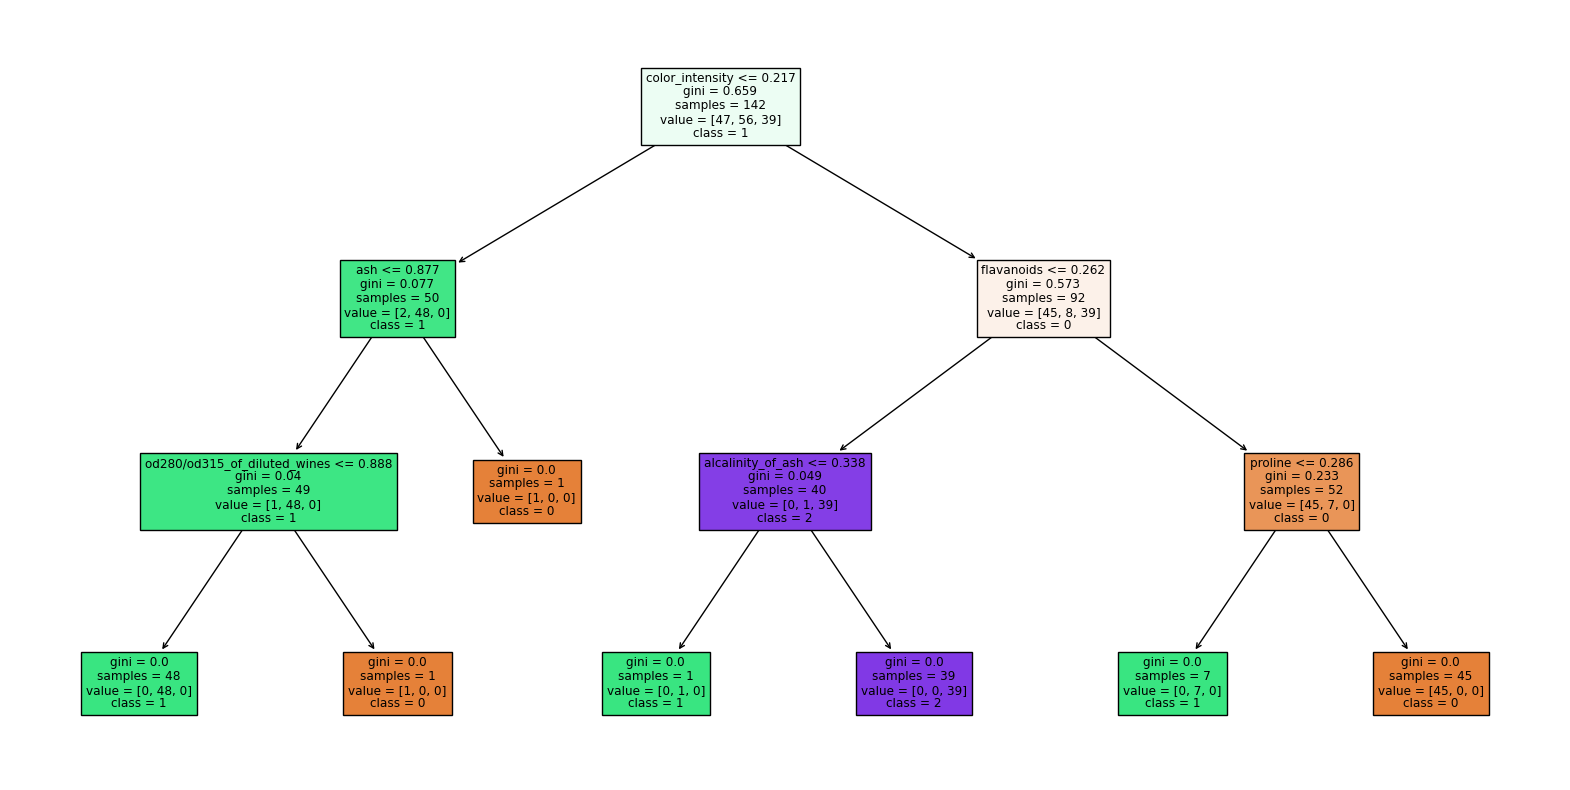

[CV] END .......ccp_alpha=0.044444444444444446, max_depth=13; total time=   0.0s
[CV] END .......ccp_alpha=0.044444444444444446, max_depth=14; total time=   0.0s
[CV] END .......ccp_alpha=0.044444444444444446, max_depth=14; total time=   0.0s
[CV] END .......ccp_alpha=0.044444444444444446, max_depth=14; total time=   0.0s
[CV] END .......ccp_alpha=0.044444444444444446, max_depth=14; total time=   0.0s
[CV] END .......ccp_alpha=0.044444444444444446, max_depth=14; total time=   0.0s
[CV] END .......ccp_alpha=0.044444444444444446, max_depth=15; total time=   0.0s
[CV] END .......ccp_alpha=0.044444444444444446, max_depth=15; total time=   0.0s
[CV] END .......ccp_alpha=0.044444444444444446, max_depth=15; total time=   0.0s
[CV] END .......ccp_alpha=0.044444444444444446, max_depth=15; total time=   0.0s
[CV] END .......ccp_alpha=0.044444444444444446, max_depth=15; total time=   0.0s
[CV] END .......ccp_alpha=0.044444444444444446, max_depth=16; total time=   0.0s
[CV] END .......ccp_alpha=0.

In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import learning_curve
import time

# Combine training and validation datasets
X_combined = np.vstack((X_train, X_valid))
y_combined = np.concatenate((y_train, y_valid))

# Initialize the Decision Tree classifier with the best hyperparameters
final_dt = DecisionTreeClassifier(random_state=42, **best_params)

# Start timing for model training on combined dataset
start_time = time.time()

# Train the final model on the combined dataset
final_dt.fit(X_combined, y_combined)

# End timing for model training on combined dataset
end_time = time.time()
training_time = end_time - start_time

# Evaluate the final model on the test set
y_pred_test = final_dt.predict(X_test)

# Calculate performance metrics on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')
precision_test = precision_score(y_test, y_pred_test, average='macro')
confusion_test = confusion_matrix(y_test, y_pred_test)

print("\nPerformance Metrics on Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"F1-score: {f1_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print("Confusion Matrix:")
print(confusion_test)
print(f"Training Time on Combined Dataset: {training_time:.2f} seconds")

# Plot feature importances for the final model
feature_importances = final_dt.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Final Model')
plt.show()

# Plot learning curve for the final model
train_sizes, train_scores, test_scores = learning_curve(
    final_dt, X_combined, y_combined, 
    train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring="accuracy", n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                 np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.1, color='r')
plt.fill_between(train_sizes, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                 np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.1, color='g')
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.xlabel('Number of Training Instances')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Final Model')
plt.legend(loc='best')
plt.grid()
plt.show()

# Visualize the final Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(final_dt, filled=True, feature_names=X.columns.tolist(), class_names=[str(i) for i in final_dt.classes_])
plt.show()

In [20]:
# Boosting

Training Time: 0.2480 seconds
Performance Metrics on Validation Set:
Accuracy: 0.7778
F1-score: 0.7788
Recall: 0.7746
Precision: 0.7852
Confusion Matrix:
[[ 8  3  1]
 [ 2 12  0]
 [ 2  0  8]]


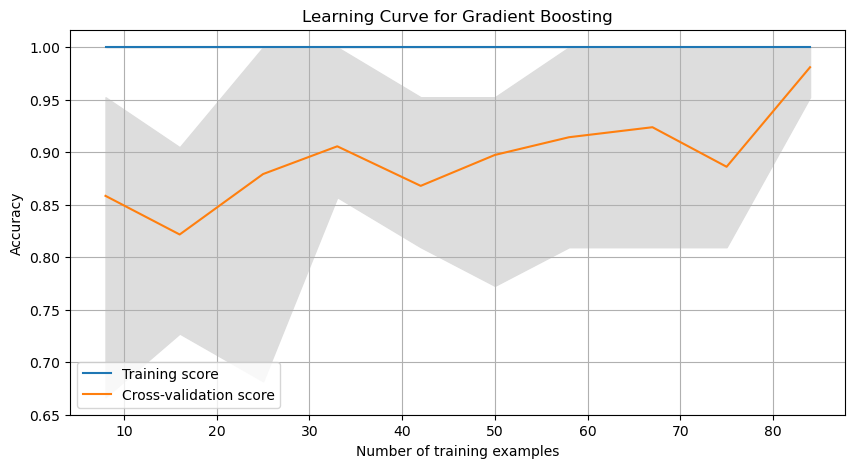

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# 1. Train Gradient Boosting on Validation Set with Default Hyperparameters

gb_model = GradientBoostingClassifier(random_state=42)
start_time = time.time()
gb_model.fit(X_train, y_train)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time

# 2. Evaluate Model Performance on Validation Set

y_pred_valid = gb_model.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred_valid)
f1 = f1_score(y_valid, y_pred_valid, average='macro')
recall = recall_score(y_valid, y_pred_valid, average='macro')
precision = precision_score(y_valid, y_pred_valid, average='macro')
confusion = confusion_matrix(y_valid, y_pred_valid)

print(f"Training Time: {training_time:.4f} seconds")
print("Performance Metrics on Validation Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print("Confusion Matrix:")
print(confusion)

# 3. Plot Learning Curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=gb_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, validation_scores_mean, label='Cross-validation score')
plt.fill_between(train_sizes, np.min(train_scores, axis=1), np.max(train_scores, axis=1), color="#DDDDDD")
plt.fill_between(train_sizes, np.min(validation_scores, axis=1), np.max(validation_scores, axis=1), color="#DDDDDD")
plt.title('Learning Curve for Gradient Boosting')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 20}


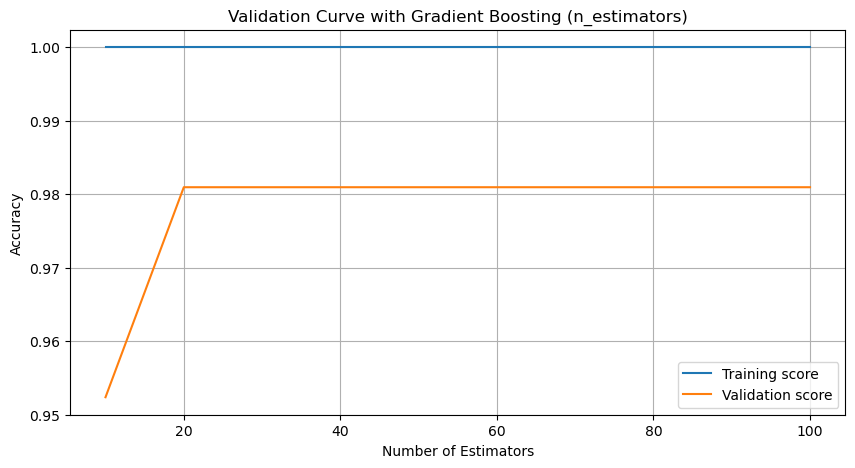

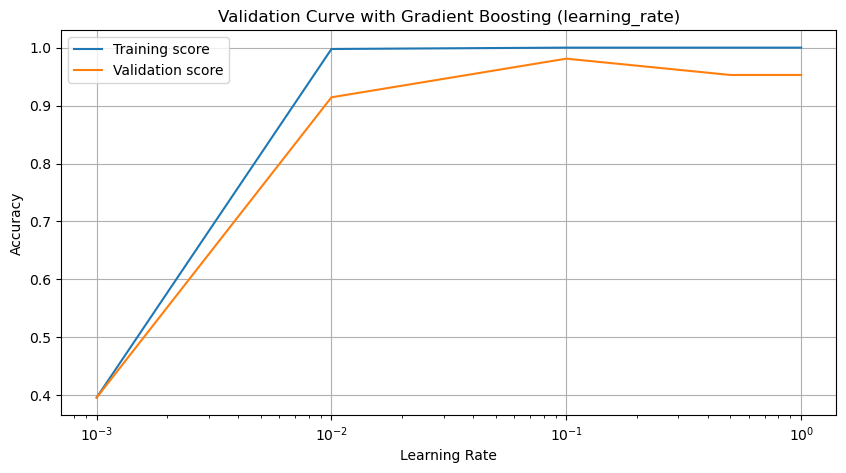

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve

# Grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1]
}

clf = GradientBoostingClassifier()
# Modify scoring to 'accuracy'
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

# 1. Validation Curve for n_estimators
learning_rate_const = grid_search.best_params_['learning_rate']
# Modify scoring to 'accuracy'
train_scores, valid_scores = validation_curve(
    GradientBoostingClassifier(learning_rate=learning_rate_const),
    X_train, y_train,
    param_name="n_estimators",
    param_range=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    cv=5, scoring='accuracy'
)

plt.figure(figsize=(10, 5))
plt.plot([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], train_scores.mean(axis=1), label='Training score')
plt.plot([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], valid_scores.mean(axis=1), label='Validation score')
plt.title('Validation Curve with Gradient Boosting (n_estimators)')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 2. Validation Curve for learning_rate
n_estimators_const = grid_search.best_params_['n_estimators']
# Modify scoring to 'accuracy'
train_scores, valid_scores = validation_curve(
    GradientBoostingClassifier(n_estimators=n_estimators_const),
    X_train, y_train,
    param_name="learning_rate",
    param_range=[0.001, 0.01, 0.1, 0.5, 1],
    cv=5, scoring='accuracy'
)

plt.figure(figsize=(10, 5))
plt.plot([0.001, 0.01, 0.1, 0.5, 1], train_scores.mean(axis=1), label='Training score')
plt.plot([0.001, 0.01, 0.1, 0.5, 1], valid_scores.mean(axis=1), label='Validation score')
plt.title('Validation Curve with Gradient Boosting (learning_rate)')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.show()


Accuracy: 0.9166666666666666
Recall: 0.912962962962963
Precision: 0.9305555555555555
F1 Score: 0.9203563145688382
Training time: 0.07 seconds


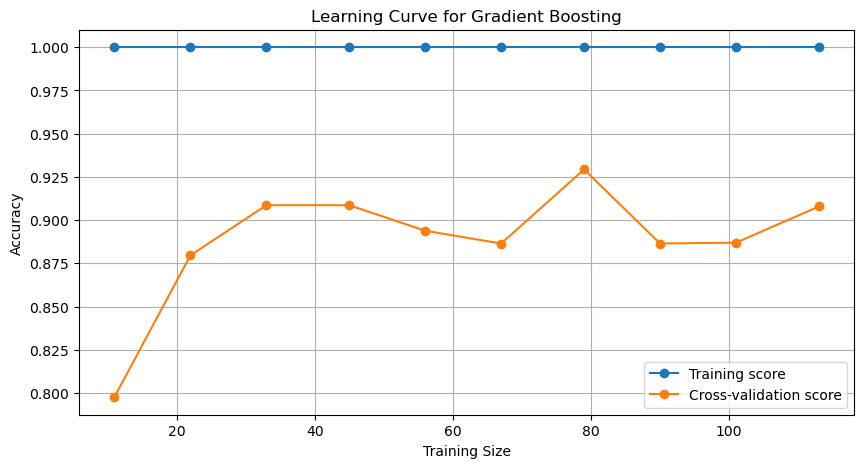

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer
from sklearn.model_selection import learning_curve
import time

# 1. Merge your training and validation sets
X_train_combined = np.vstack((X_train, X_valid))
y_train_combined = np.hstack((y_train, y_valid))

# 2. Train the GradientBoostingClassifier using the best hyperparameters
best_params = grid_search.best_params_  # Assuming grid_search was run in the previous code

clf = GradientBoostingClassifier(**best_params)

start_time = time.time()
clf.fit(X_train_combined, y_train_combined)
end_time = time.time()

# 3. Evaluate the model on the test set
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

# 4. Compute the training time
print(f"Training time: {end_time - start_time:.2f} seconds")

# 5. Plot the learning curve
# Modify scoring to 'accuracy'
train_sizes, train_scores, test_scores = learning_curve(
    GradientBoostingClassifier(**best_params),
    X_train_combined, y_train_combined,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy'
)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Gradient Boosting')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.9444444444444444
Recall: 0.9351851851851851
Precision: 0.9607843137254902
F1 Score: 0.9450660699062233
Training time: 0.07 seconds


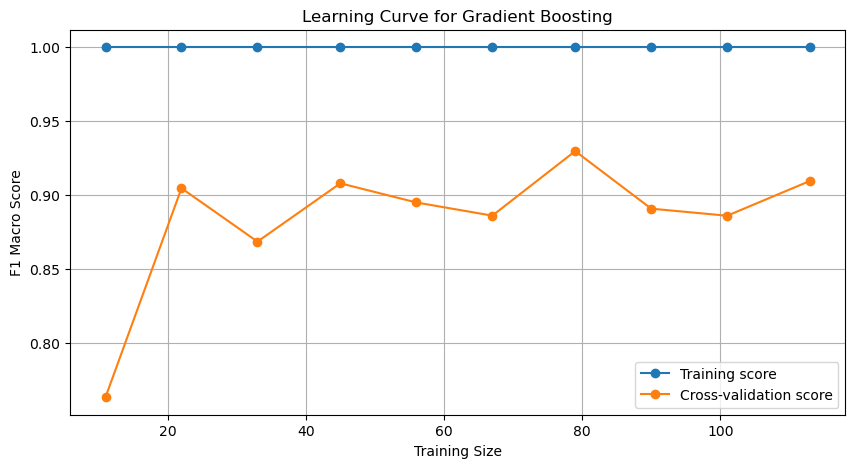

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer
from sklearn.model_selection import learning_curve
import time

# 1. Merge your training and validation sets
X_train_combined = np.vstack((X_train, X_valid))
y_train_combined = np.hstack((y_train, y_valid))

# 2. Train the GradientBoostingClassifier using the best hyperparameters
best_params = grid_search.best_params_  # Assuming grid_search was run in the previous code

clf = GradientBoostingClassifier(**best_params)

start_time = time.time()
clf.fit(X_train_combined, y_train_combined)
end_time = time.time()

# 3. Evaluate the model on the test set
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

# 4. Compute the training time
print(f"Training time: {end_time - start_time:.2f} seconds")

# 5. Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    GradientBoostingClassifier(**best_params),
    X_train_combined, y_train_combined,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='f1_macro'
)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Gradient Boosting')
plt.xlabel('Training Size')
plt.ylabel('F1 Macro Score')
plt.legend()
plt.grid(True)
plt.show()

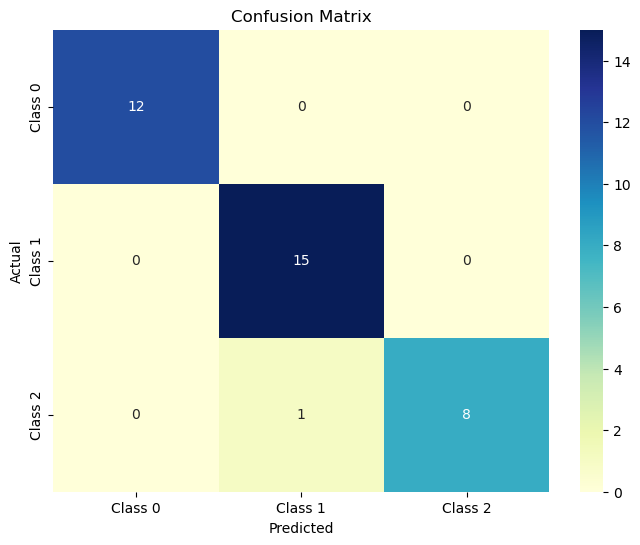

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns  # Ensure seaborn is installed for a better visualization

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap="YlGnBu", fmt='g',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [3]:
#NN 

In [29]:
#baseline model:

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import time

# Training the model
clf_baseline = MLPClassifier(max_iter=5000, random_state=42)  # Set max_iter to avoid convergence issues
start_time = time.time()
clf_baseline.fit(X_train, y_train)
end_time = time.time()

# Getting predictions
y_pred_valid = clf_baseline.predict(X_valid)

print(f"Training time: {end_time - start_time:.2f} seconds")

Training time: 0.23 seconds


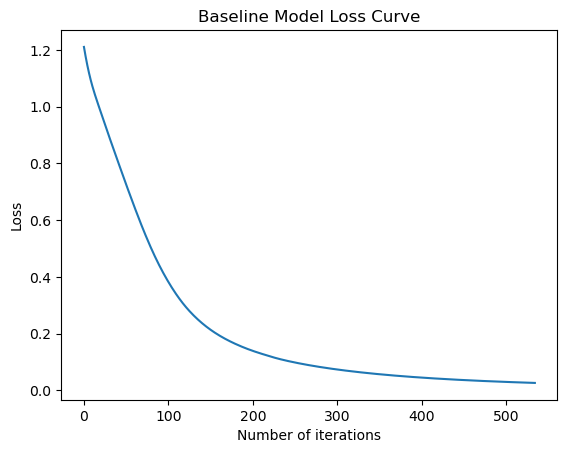

In [30]:
# Plot the loss curve
plt.plot(clf_baseline.loss_curve_)
plt.title('Baseline Model Loss Curve')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()

In [31]:
# Displaying evaluation metrics
print("Precision:", precision_score(y_valid, y_pred_valid, average='macro'))
print("Recall:", recall_score(y_valid, y_pred_valid, average='macro'))
print("Accuracy:", accuracy_score(y_valid, y_pred_valid))
print("F1 Score:", f1_score(y_valid, y_pred_valid, average='macro'))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_valid))

Precision: 1.0
Recall: 1.0
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


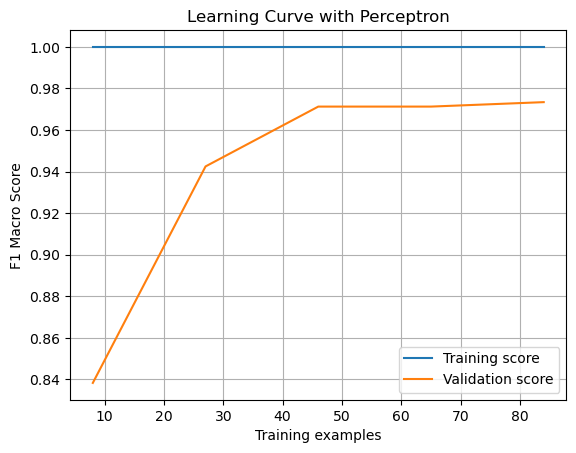

In [32]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    MLPClassifier(max_iter=5000, random_state=42), X_train, y_train, cv=5, scoring='f1_macro'
)

plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Validation score')
plt.title('Learning Curve with Perceptron')
plt.xlabel('Training examples')
plt.ylabel('F1 Macro Score')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'hidden_layer_sizes': [(i,) for i in range(5, 55, 10)] + [(i,i) for i in range(5, 55, 10)],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(MLPClassifier(max_iter=5000, random_state=42), param_grid, cv=5, scoring='f1_macro', return_train_score=True)
grid_search.fit(X_valid, y_valid)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'alpha': 0.0001, 'hidden_layer_sizes': (5,)}


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .............alpha=0.0001, hidden_layer_sizes=(50,); total time=   0.2s
[CV] END .............alpha=0.0001, hidden_layer_sizes=(50,); total time=   0.2s
[CV] END .............alpha=0.0001, hidden_layer_sizes=(50,); total time=   0.2s
[CV] END ..........alpha=0.0001, hidden_layer_sizes=(50, 50); total time=   0.1s
[CV] END ..........alpha=0.0001, hidden_layer_sizes=(50, 50); total time=   0.1s
[CV] END ..........alpha=0.0001, hidden_layer_sizes=(50, 50); total time=   0.1s
[CV] END ............alpha=0.0001, hidden_layer_sizes=(100,); total time=   0.2s
[CV] END ............alpha=0.0001, hidden_layer_sizes=(100,); total time=   0.2s
[CV] END ............alpha=0.0001, hidden_layer_sizes=(100,); total time=   0.2s
[CV] END ..............alpha=0.001, hidden_layer_sizes=(50,); total time=   0.2s
[CV] END ..............alpha=0.001, hidden_layer_sizes=(50,); total time=   0.2s
[CV] END ..............alpha=0.001, hidden_layer_

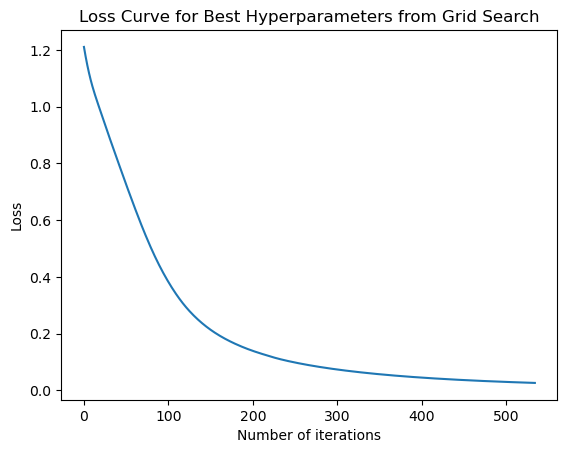

In [35]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (50, 50), (100,)],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search = GridSearchCV(MLPClassifier(max_iter=5000, random_state=42), param_grid, cv=3, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Plot the loss curve for the best estimator
plt.plot(best_clf.loss_curve_)
plt.title('Loss Curve for Best Hyperparameters from Grid Search')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()

In [36]:
y_pred_valid = grid_search.best_estimator_.predict(X_valid)

# Displaying evaluation metrics
print("Precision:", precision_score(y_valid, y_pred_valid, average='macro'))
print("Recall:", recall_score(y_valid, y_pred_valid, average='macro'))
print("Accuracy:", accuracy_score(y_valid, y_pred_valid))
print("F1 Score:", f1_score(y_valid, y_pred_valid, average='macro'))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_valid))

Precision: 1.0
Recall: 1.0
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


In [37]:
cv_results = grid_search.cv_results_
best_index = grid_search.best_index_

print(f"Cross-validation F1 Score: {cv_results['mean_test_score'][best_index]:.4f} (+/- {cv_results['std_test_score'][best_index]:.4f})")


Cross-validation F1 Score: 0.9717 (+/- 0.0233)


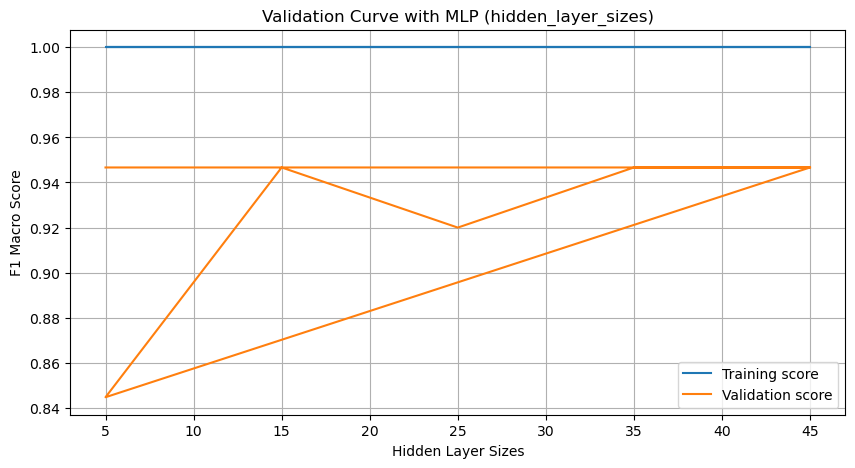

In [38]:
from sklearn.model_selection import validation_curve

train_scores, valid_scores = validation_curve(
    MLPClassifier(alpha=grid_search.best_params_['alpha'], max_iter=5000, random_state=42),
    X_valid, y_valid,
    param_name="hidden_layer_sizes",
    param_range=[(i,) for i in range(5, 55, 10)] + [(i,i) for i in range(5, 55, 10)],
    cv=5, scoring='f1_macro'
)

plt.figure(figsize=(10, 5))
plt.plot([i for i in range(5, 55, 10)]*2, train_scores.mean(axis=1), label='Training score')
plt.plot([i for i in range(5, 55, 10)]*2, valid_scores.mean(axis=1), label='Validation score')
plt.title('Validation Curve with MLP (hidden_layer_sizes)')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('F1 Macro Score')
plt.legend()
plt.grid(True)
plt.show()

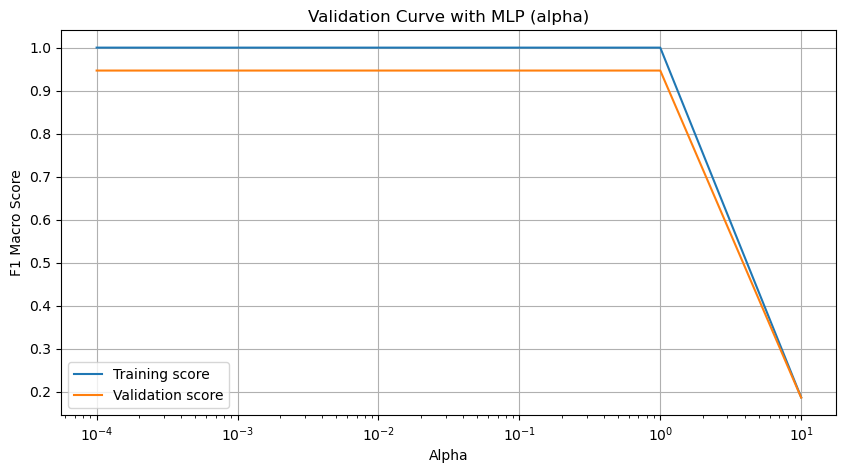

In [39]:
train_scores, valid_scores = validation_curve(
    MLPClassifier(hidden_layer_sizes=grid_search.best_params_['hidden_layer_sizes'], max_iter=5000, random_state=42),
    X_valid, y_valid,
    param_name="alpha",
    param_range=[0.0001, 0.001, 0.01, 0.1, 1, 10],
    cv=5, scoring='f1_macro'
)

plt.figure(figsize=(10, 5))
plt.semilogx([0.0001, 0.001, 0.01, 0.1, 1, 10], train_scores.mean(axis=1), label='Training score')
plt.semilogx([0.0001, 0.001, 0.01, 0.1, 1, 10], valid_scores.mean(axis=1), label='Validation score')
plt.title('Validation Curve with MLP (alpha)')
plt.xlabel('Alpha')
plt.ylabel('F1 Macro Score')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
#optimized model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import time

# 1. Combine training and validation sets
X_train_combined = np.vstack((X_train, X_valid))
y_train_combined = np.hstack((y_train, y_valid))

# 2. Train MLP using the best hyperparameters
best_params = grid_search.best_params_
clf_best = MLPClassifier(hidden_layer_sizes=best_params["hidden_layer_sizes"], 
                         alpha=best_params["alpha"], 
                         max_iter=5000, 
                         early_stopping=True, 
                         n_iter_no_change=10, 
                         random_state=42)

start_time = time.time()
clf_best.fit(X_train_combined, y_train_combined)
end_time = time.time()

# 3. Evaluate the model on the test set
y_pred = clf_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Training time: {end_time - start_time:.2f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro Precision: {precision:.4f}")
print(f"Macro F1 Score: {f1:.4f}")

Training time: 0.05 seconds
Accuracy: 0.8333
Macro Recall: 0.8315
Macro Precision: 0.8635
Macro F1 Score: 0.8391


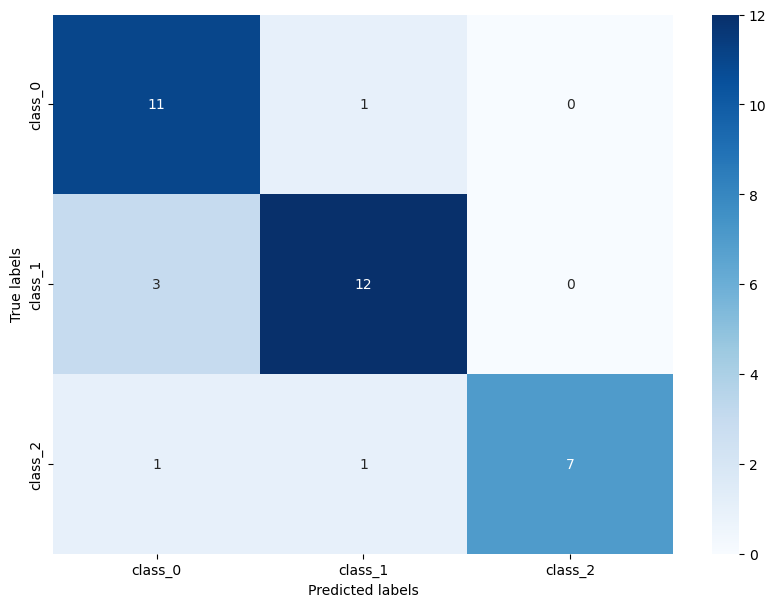

In [41]:
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, wine_data.target_names)

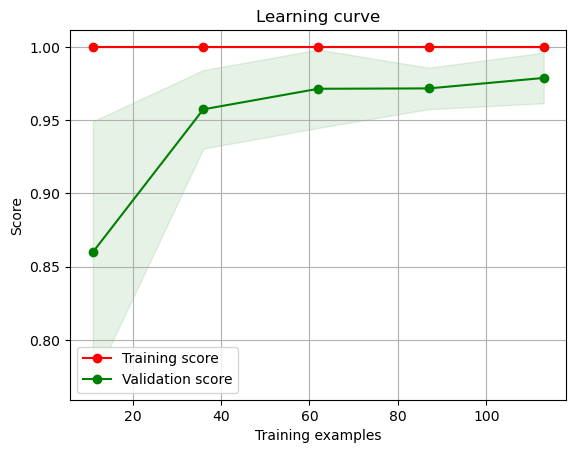

In [42]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plot learning curve for an estimator.
    """
    plt.figure()
    plt.title("Learning curve")
    
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation score")
    
    plt.legend(loc="best")
    return plt
# Using best hyperparameters from Grid Search
clf_best = MLPClassifier(hidden_layer_sizes=grid_search.best_params_['hidden_layer_sizes'], 
                         alpha=grid_search.best_params_['alpha'], max_iter=5000)

plot_learning_curve(clf_best, X=np.concatenate([X_train, X_valid]), y=np.concatenate([y_train, y_valid]), cv=5)
plt.show()

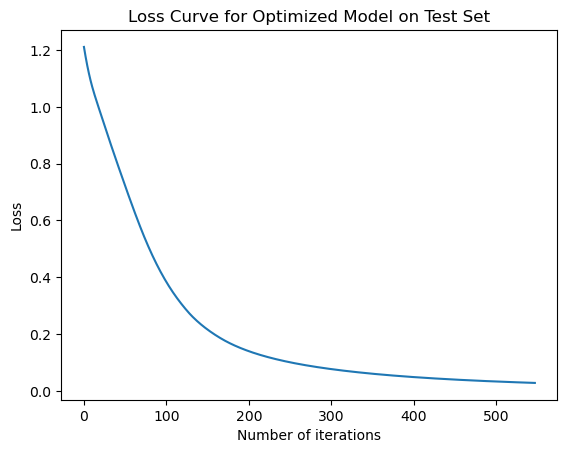

In [44]:
# Combine training and validation data
X_combined = np.vstack((X_train, X_valid))
y_combined = np.hstack((y_train, y_valid))

# Train using best hyperparameters
clf_best = MLPClassifier(hidden_layer_sizes=grid_search.best_params_['hidden_layer_sizes'], 
                          alpha=grid_search.best_params_['alpha'],
                          max_iter=5000, 
                          random_state=42)

clf_best.fit(X_combined, y_combined)

# Plot the loss curve
plt.plot(clf_best.loss_curve_)
plt.title('Loss Curve for Optimized Model on Test Set')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()


Precision: 1.0
Recall: 1.0
Accuracy: 1.0
F1-Score: 1.0
Training Time: 0.0021979808807373047
Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


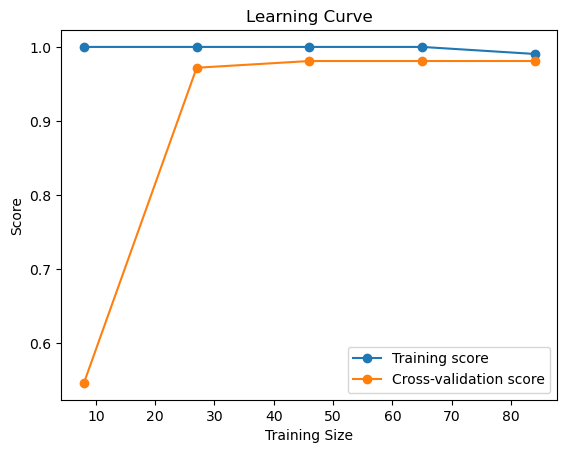

In [10]:
#SVM
#Baseline model:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import time

# Train a simple SVM with default parameters
svm_baseline = SVC()
start_time = time.time()
svm_baseline.fit(X_train, y_train)
end_time = time.time()

# Predictions
y_pred_valid = svm_baseline.predict(X_valid)

# Evaluation metrics
print("Precision:", precision_score(y_valid, y_pred_valid, average='macro'))
print("Recall:", recall_score(y_valid, y_pred_valid, average='macro'))
print("Accuracy:", accuracy_score(y_valid, y_pred_valid))
print("F1-Score:", f1_score(y_valid, y_pred_valid, average='macro'))
print("Training Time:", end_time - start_time)
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_valid))

train_sizes = np.linspace(0.1, 1.0, 10)
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(SVC(), X_train, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1,

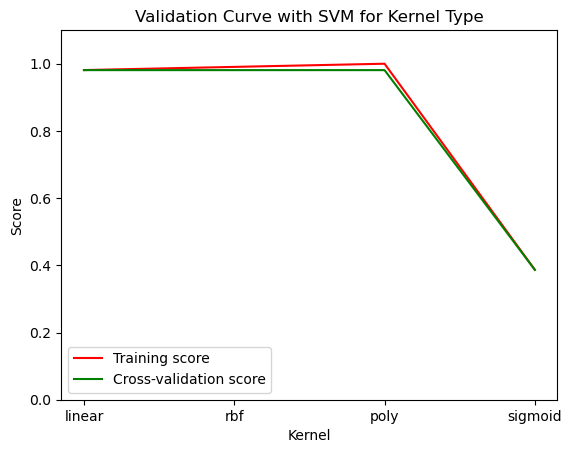

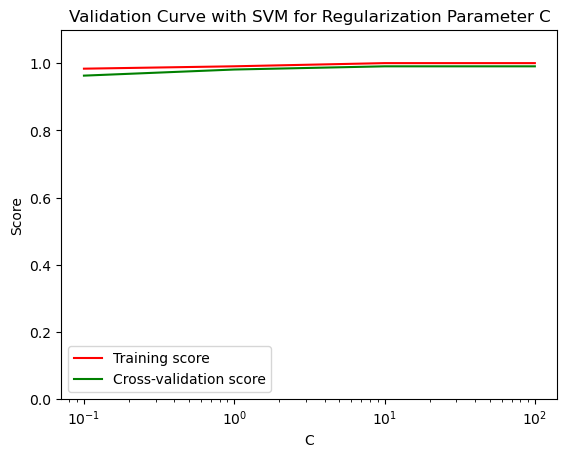

Performance metrics on the validation set:
--------------------------------------------
Precision: 1.0
Recall: 1.0
Accuracy: 1.0
F1-Score: 1.0
Training Time: 0.00045180320739746094
Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


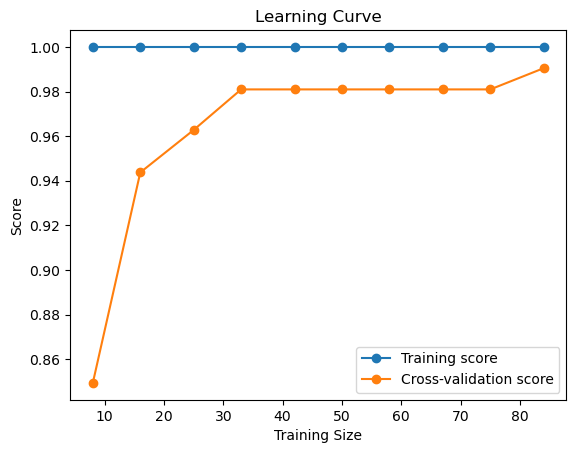

In [9]:
from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import GridSearchCV, validation_curve

# Define parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)

# Results
print("Best Parameters:", grid_search.best_params_)
print("Cross Validation Score:", grid_search.best_score_)

# Validation Curve for Kernel Type
param_range = ['linear', 'rbf', 'poly', 'sigmoid']
train_scores, test_scores = validation_curve(SVC(), X_train, y_train, param_name="kernel", param_range=param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Validation Curve with SVM for Kernel Type")
plt.xlabel("Kernel")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.legend(loc="best")
plt.show()

# Validation Curve for C
param_range = [0.1, 1, 10, 100]
train_scores, test_scores = validation_curve(SVC(), X_train, y_train, param_name="C", param_range=param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Validation Curve with SVM for Regularization Parameter C")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.legend(loc="best")
plt.show()

# Evaluate on the validation set using the best model from grid search
best_svm = grid_search.best_estimator_
start_time = time.time()
y_pred_valid = best_svm.predict(X_valid)
end_time = time.time()

# Print evaluation metrics
print("Performance metrics on the validation set:")
print("--------------------------------------------")
print("Precision:", precision_score(y_valid, y_pred_valid, average='macro'))
print("Recall:", recall_score(y_valid, y_pred_valid, average='macro'))
print("Accuracy:", accuracy_score(y_valid, y_pred_valid))
print("F1-Score:", f1_score(y_valid, y_pred_valid, average='macro'))
print("Training Time:", end_time - start_time)
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_valid))

train_sizes = np.linspace(0.1, 1.0, 10)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_svm, X_train, y_train, cv=5, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


Training time: 0.002054929733276367 seconds
Accuracy: 0.9722222222222222
Recall: 0.9629629629629629
Precision: 0.9791666666666666
F1 Score: 0.9696394686907022

Confusion Matrix (no heatmap):
[[12  0  0]
 [ 0 15  0]
 [ 0  1  8]]


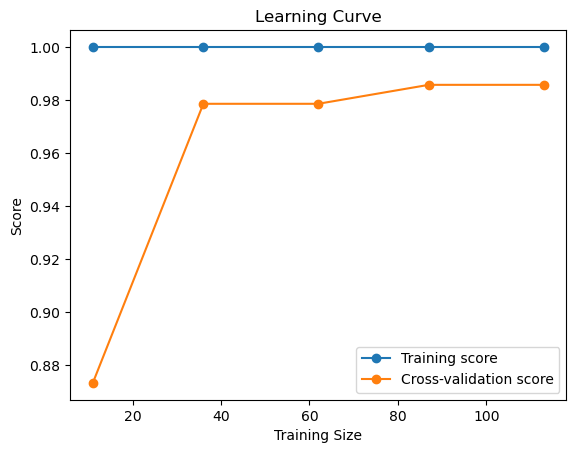

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import time
import numpy as np

# 1. Combine training and validation sets
X_combined = np.vstack((X_train, X_valid))
y_combined = np.hstack((y_train, y_valid))

# 2. Train SVM with best parameters
best_svm = SVC(C=10, kernel='rbf')

start_time = time.time()
best_svm.fit(X_combined, y_combined)
end_time = time.time()

# 3. Evaluate on test set
y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_mat = confusion_matrix(y_test, y_pred)

print(f"Training time: {end_time - start_time} seconds")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print("\nConfusion Matrix (no heatmap):")
print(conf_mat)

train_sizes = np.linspace(0.1, 1.0, 10)

# 4. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_svm, X_combined, y_combined, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()
